# Mini project 5
- '유튜브 랭크' 사이트에서 1~1000위까지 크롤링
- https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1
- 크롤링 데이터 분석 & 시각화


In [93]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time

### Chrome WebDriver 실행

In [94]:
# Chrome WebDriver 경로 설정
chrome_driver_path = "./chromedriver.exe" # 프로젝트와 같은 경로
service = Service(chrome_driver_path)

# WebDriver 실행
options = webdriver.ChromeOptions()
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(service=service, options=options)

### 유튜브 랭크 사이트 top1000 데이터 크롤링
- 수집할 데이터
    - title 제목
    - category 카테고리
    - subscriber 구독자 수
    - view 시청 수
    - video 비디오 수

- 한 페이지당 1~100위까지 볼 수 있음

In [95]:
# 유튜브 랭크 사이트 url
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page="

# 데이터 저장 리스트 초기화
titles, categories, subscribers, views, videos = [], [], [], [], []

# 사이트 열기
for i in range(1, 11): # 한 페이지 당 100개 * 10 페이지
    driver.get(url+str(i))
    
    # 페이지 자동 스크롤
    for c in range(0,14):
        driver.find_element(By.XPATH, f'//tr[{5}]/td[3]/h1/a').send_keys(Keys.PAGE_DOWN)
        time.sleep(1)

    # 각 페이지 1~100 데이터 크롤링
    for j in range(1, 101):
        try:
            title = driver.find_element(By.XPATH, f'//tr[{j}]/td[3]/h1/a').text
            category = driver.find_element(By.XPATH, f'//tr[{j}]/td[3]/h1/p').text
            subscriber = driver.find_element(By.XPATH, f'//tr[{j}]/td[4]').text
            view = driver.find_element(By.XPATH, f'//tr[{j}]/td[5]').text
            video = driver.find_element(By.XPATH, f'//tr[{j}]/td[6]').text
            
            titles.append(title)
            categories.append(category)
            subscribers.append(subscriber)
            views.append(view)
            videos.append(video)
            
        except Exception as e:
            print(f"{(i-1)*50+j}위 데이터를 가져오는 중 오류 발생: {e}")

# WebDriver 종료
driver.quit()

### 데이터 프레임 생성하기


In [96]:
df = pd.DataFrame({'ranking':range(1, 1001), 'title':titles, 
                   'category':categories, 'subscriber':subscribers, 
                   'view':views, 'video':videos})

df

,ranking,title,category,subscriber,view,video
0,1,BLACKPINK,[음악/댄스/가수],9570만,378억7825만,603개
1,2,김프로KIMPRO,[BJ/인물/연예인],8180만,511억7731만,"2,934개"
2,3,BANGTANTV,[음악/댄스/가수],7970만,241억6170만,"2,690개"
3,4,HYBE LABELS,[음악/댄스/가수],7640만,377억8802만,"2,283개"
4,5,Mark Rober,[미분류],6320만,97억9001만,192개
...,...,...,...,...,...,...
995,996,BANDAI NAMCO Europe,[미분류],92만,4억5507만,"4,428개"
996,997,도영도영이,[패션/미용],92만,9698만,278개
997,998,Big Funny,[키즈/어린이],92만,3만,43개
998,999,Healing Meditation,[음악/댄스/가수],92만,1억3446만,561개


### csv 파일로 저장 후 확인
- 엑셀 파일로 저장하려고 했으나 '고기남자' 때문에 안 됨
- csv파일로 저장하면 잘 된다

In [97]:
### 파일로 저장 후 확인
csv = "youtube_rank_top1000.csv"
df.to_csv(csv, index=False, encoding='utf-8-sig')

print(f"{csv} 저장 완료")

youtube_rank_top1000.csv 저장 완료


### 유튜브 top 1000 채널 분석 및 시각화
- 카테고리별 분석

In [71]:
# 저장된 파일 확인하기
import pandas as pd

csv = "youtube_rank_top1000.csv"
df = pd.read_csv("./"+csv)
df.head()

,ranking,title,category,subscriber,view,video
0,1,BLACKPINK,[음악/댄스/가수],9570만,378억7825만,603개
1,2,김프로KIMPRO,[BJ/인물/연예인],8180만,511억7731만,"2,934개"
2,3,BANGTANTV,[음악/댄스/가수],7970만,241억6170만,"2,690개"
3,4,HYBE LABELS,[음악/댄스/가수],7640만,377억8802만,"2,283개"
4,5,Mark Rober,[미분류],6320만,97억9001만,192개


In [72]:
data = df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ranking     1000 non-null   int64 
 1   title       1000 non-null   object
 2   category    1000 non-null   object
 3   subscriber  1000 non-null   object
 4   view        1000 non-null   object
 5   video       1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


- subscriber, view, video 컬럼을 정수형으로 변환
- 예시
    - subscriber : 92만 -> 920000
    - view : 378억 7825만 -> 37878250000
    - video : 603개 -> 603

In [74]:
# subscriber 형변환 ex)92만 -> 920000
sub = list(map(int, data['subscriber'].str.replace("만", '')))
sub = [x*10000 for x in sub]
data['subscriber'] = sub
data

,ranking,title,category,subscriber,view,video
0,1,BLACKPINK,[음악/댄스/가수],95700000,378억7825만,603개
1,2,김프로KIMPRO,[BJ/인물/연예인],81800000,511억7731만,"2,934개"
2,3,BANGTANTV,[음악/댄스/가수],79700000,241억6170만,"2,690개"
3,4,HYBE LABELS,[음악/댄스/가수],76400000,377억8802만,"2,283개"
4,5,Mark Rober,[미분류],63200000,97억9001만,192개
...,...,...,...,...,...,...
995,996,BANDAI NAMCO Europe,[미분류],920000,4억5507만,"4,428개"
996,997,도영도영이,[패션/미용],920000,9698만,278개
997,998,Big Funny,[키즈/어린이],920000,3만,43개
998,999,Healing Meditation,[음악/댄스/가수],920000,1억3446만,561개


In [75]:
# view 형변환 ex)378억 7825만 -> 37878250000
view = data['view'].str.replace("억", '')
data['view'] = view

view = list(map(int, data['view'].str.replace("만", '')))
view = [x*10000 for x in view]
data['view'] = view
data

,ranking,title,category,subscriber,view,video
0,1,BLACKPINK,[음악/댄스/가수],95700000,37878250000,603개
1,2,김프로KIMPRO,[BJ/인물/연예인],81800000,51177310000,"2,934개"
2,3,BANGTANTV,[음악/댄스/가수],79700000,24161700000,"2,690개"
3,4,HYBE LABELS,[음악/댄스/가수],76400000,37788020000,"2,283개"
4,5,Mark Rober,[미분류],63200000,9790010000,192개
...,...,...,...,...,...,...
995,996,BANDAI NAMCO Europe,[미분류],920000,455070000,"4,428개"
996,997,도영도영이,[패션/미용],920000,96980000,278개
997,998,Big Funny,[키즈/어린이],920000,30000,43개
998,999,Healing Meditation,[음악/댄스/가수],920000,134460000,561개


In [76]:
# video 603개 -> 603
video = data['video'].str.replace(",", '')
data['video'] = video

video = list(map(int, data['video'].str.replace("개", '')))
data['video'] = video
data

,ranking,title,category,subscriber,view,video
0,1,BLACKPINK,[음악/댄스/가수],95700000,37878250000,603
1,2,김프로KIMPRO,[BJ/인물/연예인],81800000,51177310000,2934
2,3,BANGTANTV,[음악/댄스/가수],79700000,24161700000,2690
3,4,HYBE LABELS,[음악/댄스/가수],76400000,37788020000,2283
4,5,Mark Rober,[미분류],63200000,9790010000,192
...,...,...,...,...,...,...
995,996,BANDAI NAMCO Europe,[미분류],920000,455070000,4428
996,997,도영도영이,[패션/미용],920000,96980000,278
997,998,Big Funny,[키즈/어린이],920000,30000,43
998,999,Healing Meditation,[음악/댄스/가수],920000,134460000,561


카테고리별 그룹화
- 구독자 수
- view 수
- video 수

In [77]:
cat = data[['category', 'subscriber', 'view', 'video']]
cat

,category,subscriber,view,video
0,[음악/댄스/가수],95700000,37878250000,603
1,[BJ/인물/연예인],81800000,51177310000,2934
2,[음악/댄스/가수],79700000,24161700000,2690
3,[음악/댄스/가수],76400000,37788020000,2283
4,[미분류],63200000,9790010000,192
...,...,...,...,...
995,[미분류],920000,455070000,4428
996,[패션/미용],920000,96980000,278
997,[키즈/어린이],920000,30000,43
998,[음악/댄스/가수],920000,134460000,561


그룹화 + 값 합산

In [78]:
cat_group = cat.groupby(by='category', as_index=False).sum()
cat_group.sort_values(by='subscriber', inplace=True, ascending=False) 


In [79]:
cat_group

,category,subscriber,view,video
12,[음악/댄스/가수],886570000,403051270000,482061
7,[미분류],773210000,383064560000,603509
16,[키즈/어린이],461390000,226174130000,177665
2,[TV/방송],285210000,259989580000,2176171
0,[BJ/인물/연예인],231840000,125712000000,69867
11,[음식/요리/레시피],231380000,82637680000,94281
6,[뉴스/정치/사회],129710000,199066080000,4383556
18,[해외],91080000,37804030000,110286
3,[게임],76010000,69508250000,158317
10,[영화/만화/애니],49290000,23222790000,30433


### 시각화
파이 차트 그리기 - 카테고리 별 구독자 비율

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

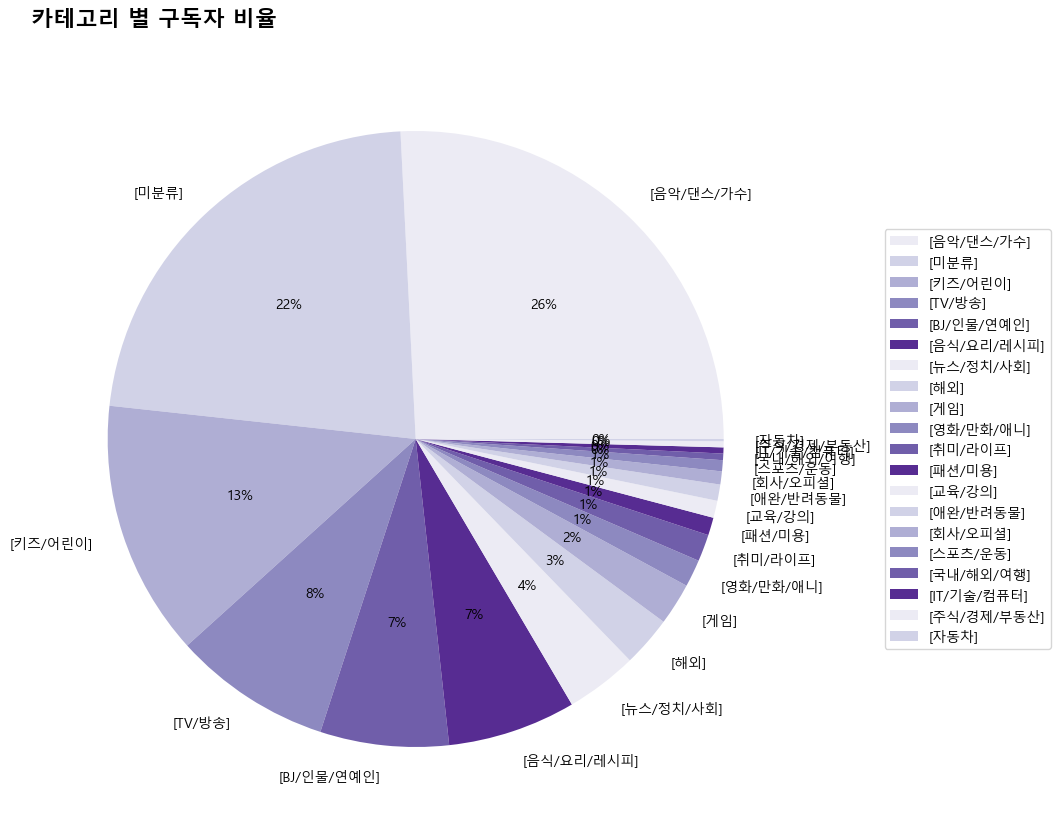

In [81]:
sub = cat_group[['category', 'subscriber']]

plt.rcParams['font.family'] ='Malgun Gothic' # 한글 표시
plt.rcParams['axes.unicode_minus'] =False

colors = sns.color_palette('Purples')[0:20]
plt.figure(figsize=(20,10))

title_font = {'fontsize': 16,'fontweight': 'bold'}
plt.title('카테고리 별 구독자 비율', fontdict=title_font, loc='left', pad=20)

#create pie chart
plt.pie(sub['subscriber'], labels = sub['category'], colors = colors, autopct='%.0f%%')
plt.legend(labels = sub['category'], loc = 'center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

- [음악/댄스/가수] 카테고리에 포함되는 유튜브 채널의 구독자가 가장 많고, [미분류], [키즈/어린이] 순
- 자동차 관련 채널의 구독자 수가 가장 적음

히트맵 그리기

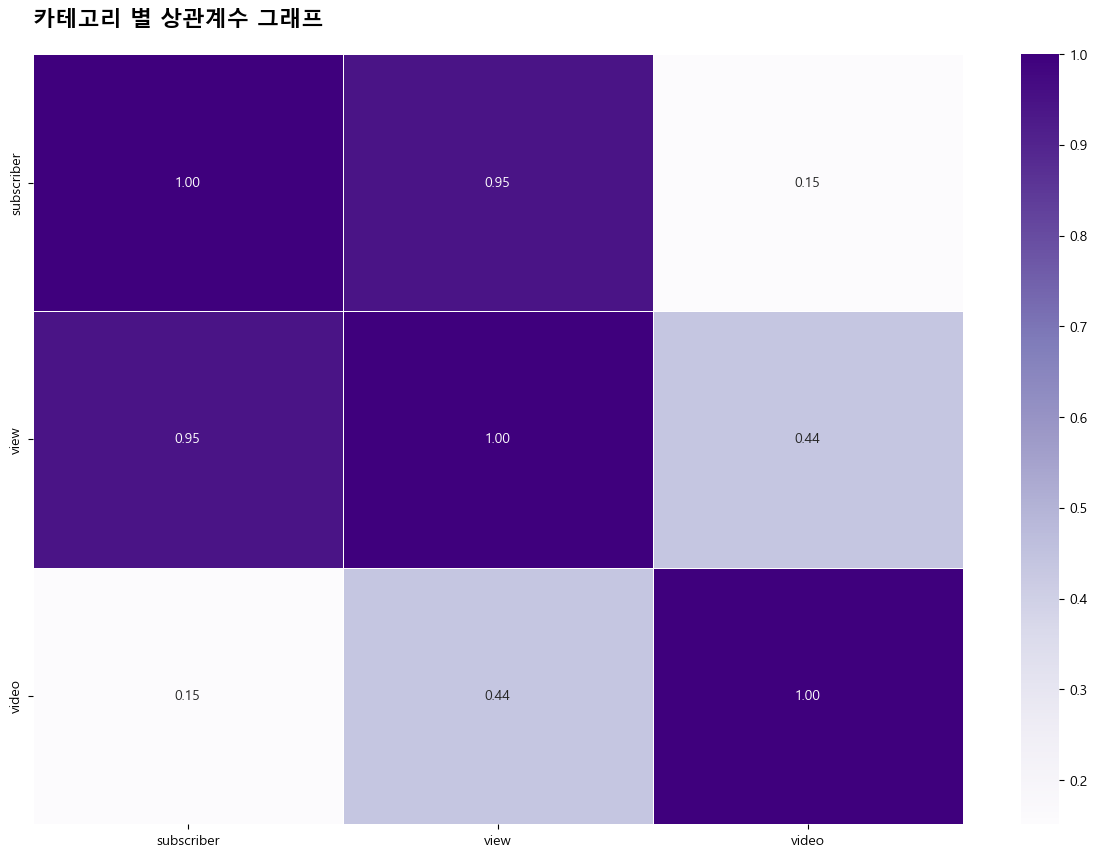

In [82]:
plt.figure(figsize=(15,10))

title_font = {'fontsize': 16,'fontweight': 'bold'}
plt.title('카테고리 별 상관계수 그래프', fontdict=title_font, loc='left', pad=20)

corr = cat_group[['subscriber', 'view', 'video']].corr()
sns.heatmap(corr, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.show()


- 구독자(subscriber)가 많을수록 view 수가 높음
- 영상의 갯수(video)는 view/구독자 수와 관련이 없음 (영상을 많이 올렸다고 해서 많이 보거나, 구독을 많이 하는 것은 아님)